In [1]:
import os # operating system
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#os.getcwd()
#os.chdir("path")

In [3]:
# import the dataset
dataset = pd.read_excel('E-com_Data.xlsx')
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [4]:
dataset.shape

(537979, 12)

In [5]:
# information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [6]:
# no. of unique
dataset.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        3479
Price                16327
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [7]:
# Check missing data
dataset.isnull().sum()

CustomerID           133790
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529634
Reason of return     537976
Sold as set          537979
dtype: int64

In [8]:
# Total number of percent
dataset.isnull().sum() / len(dataset)*100

CustomerID            24.869000
Item Code              0.000000
InvoieNo               0.000000
Date of purchase       0.000000
Quantity               0.000000
Time                   0.000000
price per Unit         0.000000
Price                  0.000000
Shipping Location      0.000000
Cancelled_status      98.448824
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

In [9]:
# we will drop missing data for customer (row wise)
# Data cleaning - duplicate data
dataset.loc[dataset.duplicated(),:]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
61202,4043.0,15819,403353,2017-12-02,1,14:07:00,447.0,447.0,Location 36,NaN,NaN,NaN
70587,3984.0,15422,405579,2017-12-09,24,14:09:00,77.0,1848.0,Location 36,NaN,NaN,NaN
84823,3828.0,14519,398139,2017-10-31,1,14:04:00,85.0,85.0,Location 36,NaN,NaN,NaN
120521,3384.0,15121,380588,2017-06-11,1,11:37:00,298.0,298.0,Location 36,NaN,NaN,NaN
182786,2607.0,15660,393225,2017-09-30,1,12:31:00,484.0,484.0,Location 36,NaN,NaN,NaN
248215,1852.0,15614,382863,2017-07-02,12,09:53:00,221.0,2652.0,Location 36,NaN,NaN,NaN
310310,1291.0,13958,368695,2017-02-14,2,16:17:00,298.0,596.0,Location 36,NaN,NaN,NaN
325175,1076.0,2020,405755,2017-12-13,12,15:48:00,58.0,696.0,Location 36,NaN,NaN,NaN
414854,NaN,2020,386281,2017-07-31,1,17:09:00,104.0,104.0,Location 36,NaN,NaN,NaN


In [10]:
#dataset.head(20)

In [11]:
# drop the duplicate data
dataset = dataset.drop_duplicates(ignore_index = True)

In [12]:
dataset.shape

(537970, 12)

In [13]:
dataset.isnull().sum()

CustomerID           133789
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529625
Reason of return     537967
Sold as set          537970
dtype: int64

In [14]:
dataset = dataset.dropna(subset=['CustomerID'])

In [15]:
dataset.shape

(404181, 12)

In [16]:
#dataset['Date'] = pd.to_datetime(dataset['Date of purchase'])

In [17]:
#dataset.head()

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          404181 non-null  object        
 2   InvoieNo           404181 non-null  int64         
 3   Date of purchase   404181 non-null  datetime64[ns]
 4   Quantity           404181 non-null  int64         
 5   Time               404181 non-null  object        
 6   price per Unit     404181 non-null  float64       
 7   Price              404181 non-null  float64       
 8   Shipping Location  404181 non-null  object        
 9   Cancelled_status   8183 non-null    float64       
 10  Reason of return   0 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 40.1+ MB


In [19]:
dataset = dataset.iloc[:,0:9]
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1


In [20]:
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1


In [21]:
dataset['Date'] = pd.to_datetime(dataset['Date of purchase'])
dataset['Date_1'] = dataset['Date']

In [22]:
dataset.head(2)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Date,Date_1
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,2017-10-29,2017-10-29
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,2017-10-05,2017-10-05


In [23]:
# Objective : Build an unsupervised learning model which can enable your 
# company to analyze their customers via RFM (Recency, Frequency and Monetary value) approach.

# Recency = Latest Date - Last invoice data
# latest date = today's date or 

# Frequency = # of invoice n. of the transaction done by customer

# Monetary = Sum of total amount purchased by customer

max(dataset['Date of purchase'])

Timestamp('2017-12-19 00:00:00')

In [24]:
min(dataset['Date of purchase'])

Timestamp('2016-12-02 00:00:00')

In [25]:
# last date = 2017-12-19
# latest data = 2017-12-20

import datetime as dt
Latest_Date = dt.datetime(2017,12,20)

In [26]:
Latest_Date

datetime.datetime(2017, 12, 20, 0, 0)

In [27]:
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Date,Date_1
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,2017-10-29,2017-10-29
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,2017-10-05,2017-10-05
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,2017-10-12,2017-10-12
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,2017-08-22,2017-08-22
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,2017-10-10,2017-10-10


In [28]:
df_recency = dataset.groupby(['CustomerID'],as_index=False)['Date of purchase'].max()
df_recency.columns = ['CustomerID','Last_Purchase_Date']
df_recency['Recency'] = (Latest_Date - df_recency['Last_Purchase_Date']).dt.days
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
FM_Table = dataset.groupby('CustomerID').agg({'InvoieNo'   : lambda x:len(x),'Price'  : lambda x:x.sum()})
FM_Table.rename(columns = {'InvoieNo' :'Frequency','Price':'Monetary_Value'},inplace= True)
RFM_Table = df_recency.merge(FM_Table,left_on='CustomerID',right_on='CustomerID')

In [29]:
RFM_Table

,CustomerID,Recency,Frequency,Monetary_Value
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,754,280608.0


In [30]:
# Create RMF model by each customer

RMFScore = dataset.groupby('CustomerID').agg({'Date_1': lambda x : (Latest_Date - x.max()).days,
                                            'Date': lambda x : x.count(),
                                            'Price' : lambda x : x.sum()})

In [31]:
RMFScore['Date'] = RMFScore['Date'].astype(int)
RMFScore.rename(columns = {'Date_1' : "Recency", "Date": "Frequency","Price":"Monetory"},
               inplace = True)

RMFScore.reset_index().head(100)

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
95,97.0,49,83,160470.0
96,98.0,11,22,99624.0
97,99.0,10,49,87593.0
98,100.0,147,38,85253.0


In [32]:
# EDA Part : 
RMFScore.Recency.describe()

count    4349.000000
mean       93.299379
std       100.701315
min         1.000000
25%        18.000000
50%        51.000000
75%       144.000000
max       381.000000
Name: Recency, dtype: float64

In [33]:
# split the data into four segments using quantile method
quantiles = RMFScore.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [34]:
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [35]:
# Create own function to define R, F and M Segment

def RScoring(x,p,d):
    if x<= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else :
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75] :
        return 2
    else :
        return 1

In [36]:
RMFScore.columns

Index(['Recency', 'Frequency', 'Monetory'], dtype='object')

In [37]:
RMFScore['R'] = RMFScore['Recency'].apply(RScoring, args = ('Recency', quantiles,))
RMFScore['F'] = RMFScore['Frequency'].apply(FnMScoring, args = ('Frequency', quantiles,))
RMFScore['M'] = RMFScore['Monetory'].apply(FnMScoring, args = ('Monetory', quantiles,))

In [38]:
RMFScore.head(20)

,Recency,Frequency,Monetory,R,F,M
CustomerID,,,,,,
2.0,4,182,553704.0,1,1,1
3.0,77,27,257404.0,3,3,1
4.0,19,72,176613.0,2,2,2
5.0,311,16,41976.0,4,4,3
6.0,37,84,151822.0,2,2,2
7.0,208,4,9410.0,4,4,4
8.0,233,58,135550.0,4,2,2
9.0,215,13,65832.0,4,4,3
10.0,25,58,331601.0,2,2,1


In [39]:
RMFScore['RFMGroup'] = RMFScore.R.map(str) + RMFScore.F.map(str) + RMFScore.M.map(str)

In [40]:
RMFScore.head(10)

,Recency,Frequency,Monetory,R,F,M,RFMGroup
CustomerID,,,,,,,
2.0,4,182,553704.0,1,1,1,111
3.0,77,27,257404.0,3,3,1,331
4.0,19,72,176613.0,2,2,2,222
5.0,311,16,41976.0,4,4,3,443
6.0,37,84,151822.0,2,2,2,222
7.0,208,4,9410.0,4,4,4,444
8.0,233,58,135550.0,4,2,2,422
9.0,215,13,65832.0,4,4,3,443
10.0,25,58,331601.0,2,2,1,221


In [41]:
RMFScore['RFMScore'] = RMFScore[['R','F','M']].sum(axis=1)

In [42]:
RMFScore.head(20)

,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
2.0,4,182,553704.0,1,1,1,111,3
3.0,77,27,257404.0,3,3,1,331,7
4.0,19,72,176613.0,2,2,2,222,6
5.0,311,16,41976.0,4,4,3,443,11
6.0,37,84,151822.0,2,2,2,222,6
7.0,208,4,9410.0,4,4,4,444,12
8.0,233,58,135550.0,4,2,2,422,8
9.0,215,13,65832.0,4,4,3,443,11
10.0,25,58,331601.0,2,2,1,221,5


In [43]:
# Assign Loyality level to each customer

Loyalty_level = ['Diamond','Platinum','Gold','Silver']

score_cuts = pd.qcut(RMFScore.RFMScore, q = 4, labels = Loyalty_level)

RMFScore['RFM_Loyalty_level'] = score_cuts.values
RMFScore.reset_index().head(20)

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level
0,2.0,4,182,553704.0,1,1,1,111,3,Diamond
1,3.0,77,27,257404.0,3,3,1,331,7,Platinum
2,4.0,19,72,176613.0,2,2,2,222,6,Platinum
3,5.0,311,16,41976.0,4,4,3,443,11,Silver
4,6.0,37,84,151822.0,2,2,2,222,6,Platinum
5,7.0,208,4,9410.0,4,4,4,444,12,Silver
6,8.0,233,58,135550.0,4,2,2,422,8,Platinum
7,9.0,215,13,65832.0,4,4,3,443,11,Silver
8,10.0,25,58,331601.0,2,2,1,221,5,Diamond
9,11.0,34,131,771439.0,2,1,1,211,4,Diamond


In [44]:
# validate the data for RFMGroup = 111

RMFScore[RMFScore['RFMGroup']=='111'].sort_values('Monetory', ascending=False).reset_index().head(25)

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level
0,1704.0,3,2053,35536194.0,1,1,1,111,3,Diamond
1,1896.0,2,5874,17743855.0,1,1,1,111,3,Diamond
2,1346.0,10,1395,12647317.0,1,1,1,111,3,Diamond
3,3802.0,3,1060,12319439.0,1,1,1,111,3,Diamond
4,4234.0,3,322,10654918.0,1,1,1,111,3,Diamond
5,1006.0,5,571,9351019.0,1,1,1,111,3,Diamond
6,3203.0,5,269,8102167.0,1,1,1,111,3,Diamond
7,2193.0,1,2489,7966054.0,1,1,1,111,3,Diamond
8,1448.0,5,1638,7892625.0,1,1,1,111,3,Diamond
9,3759.0,10,263,7545149.0,1,1,1,111,3,Diamond


In [45]:
RMFScore=RMFScore.reset_index()

In [46]:
def handle_neg_n_zero(num):
    if num <=0 :
        return 1
    else :
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RMFScore['Recency'] = [handle_neg_n_zero(x) for x in RMFScore.Recency]
RMFScore['Monetory'] = [handle_neg_n_zero(x) for x in RMFScore.Monetory]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RMFScore[['Recency', 'Frequency', 'Monetory']].apply(np.log, axis = 1).round(3)

In [47]:
RMFScore.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetory', 'R', 'F', 'M',
       'RFMGroup', 'RFMScore', 'RFM_Loyalty_level'],
      dtype='object')

In [48]:
# Recency and Frequency - not required as we don't have negative value
# RMFScore['Recency'] = [handle_neg_n_zero(x) for x in RMFScore.Recency]

In [49]:
#RMFScore['Monetory'] = [handle_neg_n_zero(x) for x in RMFScore.Monetory]

In [50]:
Log_Tfd_Data.head()

,Recency,Frequency,Monetory
0,1.386,5.204,13.224
1,4.344,3.296,12.458
2,2.944,4.277,12.082
3,5.740,2.773,10.645
4,3.611,4.431,11.930


In [51]:
newdata = RMFScore[['Recency', 'Frequency', 'Monetory']]

In [52]:
newdata.head()

,Recency,Frequency,Monetory
0,4,182,553704.0
1,77,27,257404.0
2,19,72,176613.0
3,311,16,41976.0
4,37,84,151822.0


# Feature Scaling

<AxesSubplot:ylabel='Monetory'>

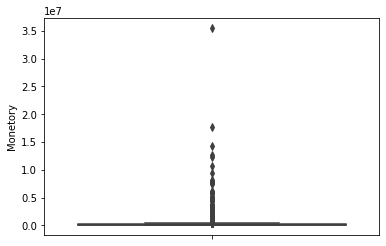

In [53]:
sns.boxplot(y = 'Monetory', data=RMFScore)

In [54]:
from sklearn.preprocessing import StandardScaler
scalobj = StandardScaler()
scaled_data = scalobj.fit_transform(newdata)
scaled_data

array([[-0.88687668,  0.38379456,  0.37766904],
       [-0.16187726, -0.28413542,  0.03198725],
       [-0.73790419, -0.09022026, -0.0622685 ],
       ...,
       [-0.83721918, -0.34446458, -0.23919388],
       [-0.88687668,  2.84867167,  0.05905846],
       [-0.48961672, -0.09883872,  0.03830589]])

In [55]:
scaled_data = pd.DataFrame(scaled_data, index =RMFScore.index, columns= newdata.columns)

In [56]:
scaled_data.head()

,Recency,Frequency,Monetory
0,-0.886877,0.383795,0.377669
1,-0.161877,-0.284135,0.031987
2,-0.737904,-0.090220,-0.062268
3,2.162093,-0.331537,-0.219344
4,-0.559137,-0.038510,-0.091191


# Build Clustering Model 

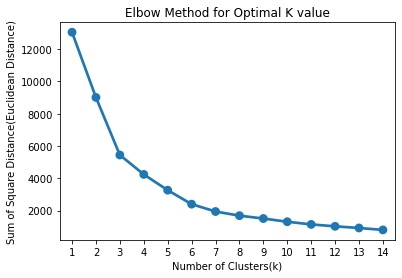

In [57]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}

for k in range(1,15):
    km = KMeans(n_clusters = k, init='k-means++', max_iter=300)
    km = km.fit(scaled_data)
    sum_of_sq_dist[k] = km.inertia_
    
# Visualisation for getting elbow method (to find the actual k value)

sns.pointplot(x = list(sum_of_sq_dist.keys()),
             y = list(sum_of_sq_dist.values()))
plt.xlabel("Number of Clusters(k)")
plt.ylabel("Sum of Square Distance(Euclidean Distance)")
plt.title("Elbow Method for Optimal K value")
plt.show()

In [58]:
km = KMeans(n_clusters = 4, init='k-means++', max_iter=300)

In [59]:
y_kmeans = km.fit_predict(scaled_data)

In [60]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
RMFScore['Cluster'] = km.labels_
RMFScore.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level,Cluster
0,2.0,4,182,553704.0,1,1,1,111,3,Diamond,0
1,3.0,77,27,257404.0,3,3,1,331,7,Platinum,0
2,4.0,19,72,176613.0,2,2,2,222,6,Platinum,0
3,5.0,311,16,41976.0,4,4,3,443,11,Silver,1
4,6.0,37,84,151822.0,2,2,2,222,6,Platinum,0


In [62]:
RMFScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         4349 non-null   float64 
 1   Recency            4349 non-null   int64   
 2   Frequency          4349 non-null   int32   
 3   Monetory           4349 non-null   float64 
 4   R                  4349 non-null   int64   
 5   F                  4349 non-null   int64   
 6   M                  4349 non-null   int64   
 7   RFMGroup           4349 non-null   object  
 8   RFMScore           4349 non-null   int64   
 9   RFM_Loyalty_level  4349 non-null   category
 10  Cluster            4349 non-null   int32   
dtypes: category(1), float64(2), int32(2), int64(5), object(1)
memory usage: 310.4+ KB


In [63]:
RMFScore.head(1)

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level,Cluster
0,2.0,4,182,553704.0,1,1,1,111,3,Diamond,0


In [64]:
# Look at the centroids per cluster
centroid_df = RMFScore.groupby('RFM_Loyalty_level')[['Recency','Frequency','Monetory',
                                          'CustomerID']].agg({'Recency':'mean',
                                                             'Frequency':'mean',
                                                             'Monetory':'mean',
                                                             'CustomerID':'nunique'}).reset_index()

In [65]:
# look at the centroids per cluster
centroid_df = RMFScore.groupby('Cluster')[['Recency', 'Frequency', 'Monetory','CustomerID']].agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetory':'mean','CustomerID':'nunique'}).reset_index()
centroid_df = centroid_df.rename(columns = {'CustomerID':'NumBuyers'})
centroid_df

,Cluster,Recency,Frequency,Monetory,NumBuyers
0,0,41.450309,104.135185,2.376170e+05,3240
1,1,248.057587,27.929616,5.767591e+04,1094
2,2,2.500000,5889.500000,8.363220e+06,4
3,3,6.818182,1151.818182,1.216187e+07,11


In [66]:
centroid_df['Percent'] = round(centroid_df['NumBuyers']/centroid_df.NumBuyers.sum()*100,2)
centroid_df

,Cluster,Recency,Frequency,Monetory,NumBuyers,Percent
0,0,41.450309,104.135185,2.376170e+05,3240,74.50
1,1,248.057587,27.929616,5.767591e+04,1094,25.16
2,2,2.500000,5889.500000,8.363220e+06,4,0.09
3,3,6.818182,1151.818182,1.216187e+07,11,0.25


In [67]:
centroid_df_1 = RMFScore.groupby('RFM_Loyalty_level')[['Recency', 'Frequency', 'Monetory','CustomerID']].agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetory':'sum','CustomerID':'nunique'}).reset_index()
centroid_df_1 = centroid_df_1.rename(columns = {'CustomerID':'NumBuyers'})
centroid_df_1

,RFM_Loyalty_level,Recency,Frequency,Monetory,NumBuyers
0,Diamond,20.287276,230.898517,764912338.0,1281
1,Platinum,64.038081,57.903275,166232803.0,1313
2,Gold,126.173057,24.640415,50303892.1,965
3,Silver,220.167089,10.879747,18761106.0,790


In [68]:
centroid_df_1['Percent'] = round(centroid_df_1['NumBuyers']/centroid_df_1.NumBuyers.sum()*100,2)
centroid_df_1

,RFM_Loyalty_level,Recency,Frequency,Monetory,NumBuyers,Percent
0,Diamond,20.287276,230.898517,764912338.0,1281,29.46
1,Platinum,64.038081,57.903275,166232803.0,1313,30.19
2,Gold,126.173057,24.640415,50303892.1,965,22.19
3,Silver,220.167089,10.879747,18761106.0,790,18.17


In [69]:
!pip install squarify
import squarify

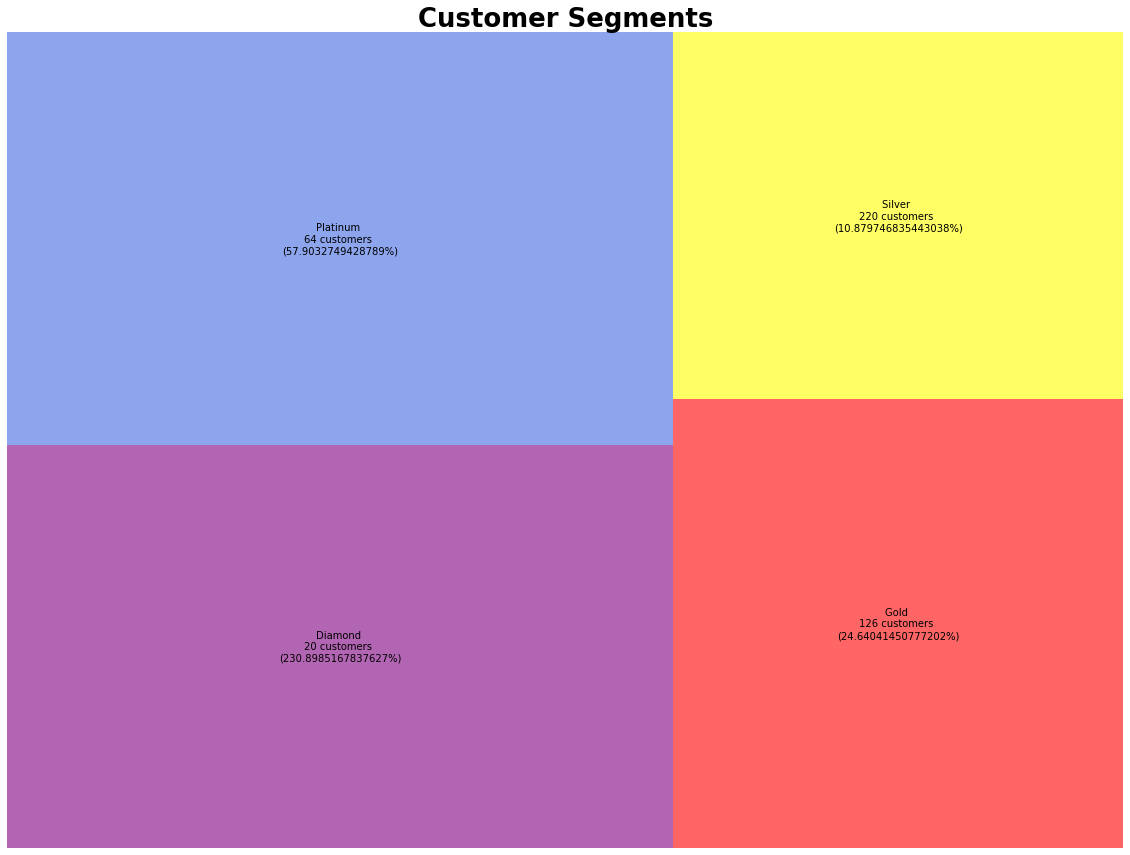

In [70]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,15)
colors_dict ={'0': 'Purple','1':'royalblue','2':'red','3':'yellow'}

squarify.plot(sizes=centroid_df_1['NumBuyers'],
             color=colors_dict.values(),
             label=['{} \n{:.0f} customers \n({}%)'.format(*centroid_df_1.iloc[i])
             for i in range (0,len(centroid_df_1))], alpha=0.6)

plt.title("Customer Segments", fontsize=26, fontweight="bold")
plt.axis("off")

plt.show()

In [71]:
RMFScore.to_excel('Final_output.xlsx')

In [72]:
os.getcwd()

'C:\\Users\\VIREN\\Desktop'

In [73]:
# Supply Chain Management****
# Clinical Dataset
# Human Resources
# Time Series Forecasting
# Classification problem & Regression 
# Deep Learning
# NLP - BERT/GPT1/2/3
# computervision
# Image Processing 


In [74]:
# https://drive.google.com/drive/folders/1cAtUHmtF2FRzM40xYsgX-Y4WSQoB9b56
# https://drive.google.com/drive/folders/17TXMYSCVfpu1ppGlkXlo4do4d6v72-DM

